In [1]:
# pylint: disable=invalid-name

In [2]:
import sys
import os
import logging
import gymnasium as gym
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
import cyberbattle.agents.baseline.agent_drqn as drqn
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
from cyberbattle._env.cyberbattle_env import CyberBattleEnv

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

In [3]:
%matplotlib inline

In [4]:
# Papermill notebook parameters
gymid = "CyberBattleChain-v0"
env_size = 10
iteration_count = 9000
training_episode_count = 50
eval_episode_count = 5
maximum_node_count = 22
maximum_total_credentials = 22
plots_dir = "output/plots"

In [5]:
# Parameters
gymid = "CyberBattleToyCtf-v0"
env_size = None
iteration_count = 100
training_episode_count = 3
eval_episode_count = 5
maximum_node_count = 12
maximum_total_credentials = 10
plots_dir = "notebooks/output/toyctf_random/plots"


In [6]:
os.makedirs(plots_dir, exist_ok=True)

# Load the Gym environment
if env_size:
    _gym_env = gym.make(gymid, size=env_size)
else:
    _gym_env = gym.make(gymid)

from typing import cast

gym_env = cast(CyberBattleEnv, _gym_env.unwrapped)
assert isinstance(gym_env, CyberBattleEnv), f"Expected CyberBattleEnv, got {type(gym_env)}"

ep = w.EnvironmentBounds.of_identifiers(maximum_node_count=maximum_node_count, maximum_total_credentials=maximum_total_credentials, identifiers=gym_env.identifiers)

In [7]:
debugging = False
if debugging:
    print(f"port_count = {ep.port_count}, property_count = {ep.property_count}")

    gym_env.environment
    # training_env.environment.plot_environment_graph()
    gym_env.environment.network.nodes
    gym_env.action_space
    gym_env.action_space.sample()
    gym_env.observation_space.sample()
    o0, _ = gym_env.reset()
    o_test, r, d, t, i = gym_env.step(gym_env.sample_valid_action())
    o0, _ = gym_env.reset()

    o0.keys()

    fe_example = w.RavelEncoding(ep, [w.Feature_active_node_properties(ep), w.Feature_discovered_node_count(ep)])
    a = w.StateAugmentation(o0)
    w.Feature_discovered_ports(ep).get(a)
    fe_example.encode_at(a, 0)

In [8]:
# Evaluate the random agent
random_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=learner.RandomPolicy(),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    plot_episodes_length=False,
    render_last_episode_rewards_to=os.path.join(plots_dir, f"random-{gymid}"),
    title="Random search",
)

###### Random search
Learning with: episode_count=5,iteration_count=100,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/5 'Random search' ϵ=1.0000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 51|reward:   36.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 51|reward:   36.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 1|Iteration 52|reward:   36.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 1|Iteration 66|reward:   36.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 1|Iteration 68|reward:   47.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 1|Iteration 68|reward:   47.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 1|Iteration 69|reward:   56.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 1|Iteration 69|reward:   56.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 75|reward:   62.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 75|reward:   62.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 1|Iteration 92|reward:   62.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 1|Iteration 100|reward:   62.0|last_reward_at:   75|Elapsed Time: 0:00:00||

  Episode 1 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/21 (0.05)
    explore-remote: 5/55 (0.08)
    explore-connect: 0/18 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'Random search' ϵ=1.0000, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:   11.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:   22.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:   33.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:   33.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 63|reward:   33.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 78|reward:   47.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 78|reward:   47.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 2|Iteration 100|reward:   47.0|last_reward_at:   78|Elapsed Time: 0:00:00||

  Episode 2 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/21 (0.05)
    explore-remote: 3/66 (0.04)
    explore-connect: 0/9 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'Random search' ϵ=1.0000, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 45|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:   31.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:   31.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 63|reward:   31.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 82|reward:   31.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 86|reward:   42.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 86|reward:   42.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 3|Iteration 100|reward:   42.0|last_reward_at:   86|Elapsed Time: 0:00:00||

  Episode 3 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/16 (0.06)
    explore-remote: 3/49 (0.06)
    explore-connect: 0/31 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/5 'Random search' ϵ=1.0000, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:   22.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:   33.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:   33.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:   44.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:   44.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:   53.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:   53.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 70|reward:   53.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 77|reward:   67.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 77|reward:   67.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 4|Iteration 95|reward:   67.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 4|Iteration 98|reward:   78.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 4|Iteration 98|reward:   78.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 4|Iteration 100|reward:   78.0|last_reward_at:   98|Elapsed Time: 0:00:00||

  Episode 4 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/15 (0.06)
    explore-remote: 6/50 (0.11)
    explore-connect: 0/28 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'Random search' ϵ=1.0000, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
Website,discovered,NaN,None,"[ScanPageContent, ScanPageSource]"


Episode 5|Iteration 5|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 5|Iteration 22|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 5|Iteration 22|reward:   22.0|last_reward_at:   22|Elapsed Time: 0:00:03||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
Website,discovered,NaN,None,"[ScanPageContent, ScanPageSource]"
GitHubProject,discovered,NaN,None,[CredScanGitHistory]


Episode 5|Iteration 23|reward:   22.0|last_reward_at:   22|Elapsed Time: 0:00:04||

Episode 5|Iteration 27|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:00:04||

Episode 5|Iteration 27|reward:   36.0|last_reward_at:   27|Elapsed Time: 0:00:04||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
Website,discovered,NaN,None,"[ScanPageContent, ScanPageSource]"
GitHubProject,discovered,NaN,None,[CredScanGitHistory]
AzureStorage,discovered,NaN,None,[AccessDataWithSASToken]


Episode 5|Iteration 28|reward:   36.0|last_reward_at:   27|Elapsed Time: 0:00:04||

Episode 5|Iteration 44|reward:   36.0|last_reward_at:   27|Elapsed Time: 0:00:04||

Episode 5|Iteration 63|reward:   36.0|last_reward_at:   27|Elapsed Time: 0:00:05||

Episode 5|Iteration 68|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:00:05||

Episode 5|Iteration 68|reward:   42.0|last_reward_at:   68|Elapsed Time: 0:00:05||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
Website,discovered,NaN,None,"[ScanPageContent, ScanPageSource]"
GitHubProject,discovered,NaN,None,[CredScanGitHistory]
AzureStorage,discovered,NaN,None,[AccessDataWithSASToken]


Episode 5|Iteration 69|reward:   42.0|last_reward_at:   68|Elapsed Time: 0:00:05||

Episode 5|Iteration 97|reward:   92.0|last_reward_at:   68|Elapsed Time: 0:00:05||

Episode 5|Iteration 97|reward:   92.0|last_reward_at:   97|Elapsed Time: 0:00:05||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
AzureStorage,owned,[CTFFLAG:LeakedCustomerData],[],[AccessDataWithSASToken]
Website,discovered,NaN,None,"[ScanPageContent, ScanPageSource]"
GitHubProject,discovered,NaN,None,[CredScanGitHistory]


Episode 5|Iteration 98|reward:   92.0|last_reward_at:   97|Elapsed Time: 0:00:06||

Episode 5|Iteration 100|reward:   92.0|last_reward_at:   97|Elapsed Time: 0:00:06||

  Episode 5 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/12 (0.08)
    explore-remote: 3/52 (0.05)
    explore-connect: 1/31 (0.03)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


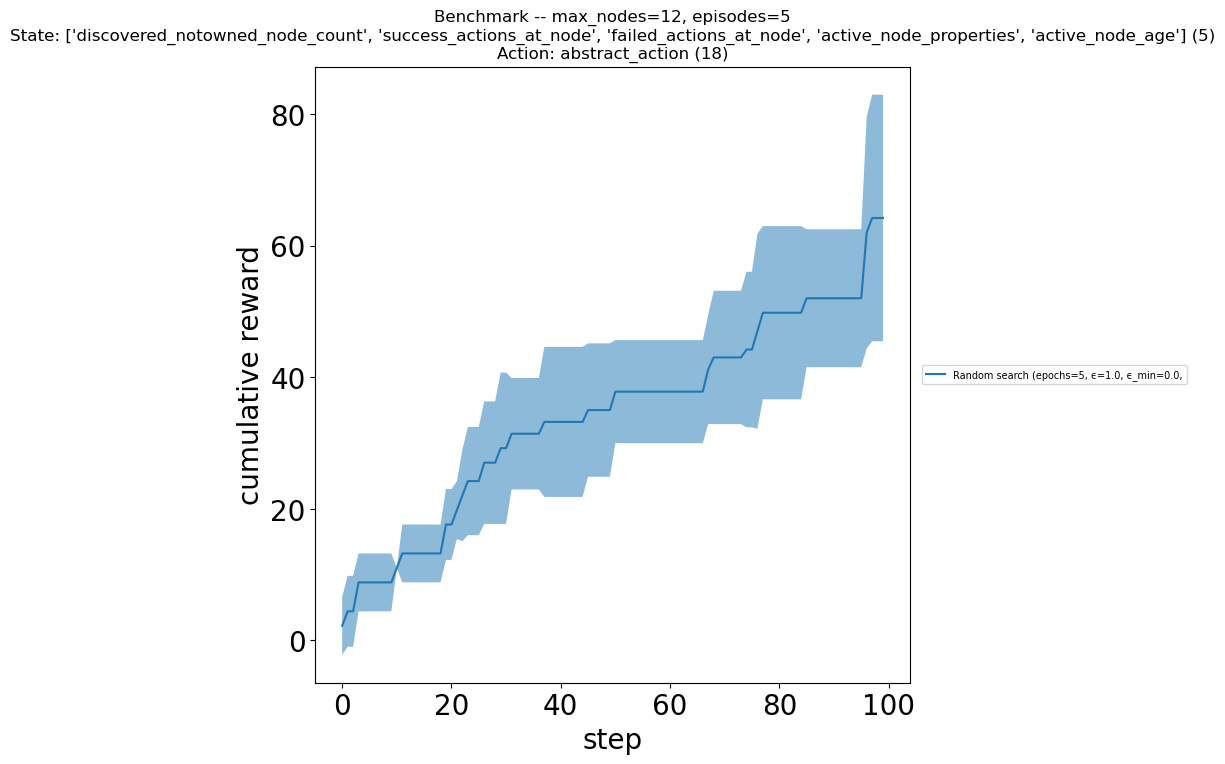

In [9]:
# Compare and plot results for all the agents
all_runs = [
    random_run,
]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=(
        f"Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count}\n"
        f"State: {[f.name() for f in themodel.state_space.feature_selection]} "
        f"({len(themodel.state_space.feature_selection)})\n"
        f"Action: abstract_action ({themodel.action_space.flat_size()})"
    ),
    save_at=os.path.join(plots_dir, f"benchmark-{gymid}-cumrewards.png"),
)

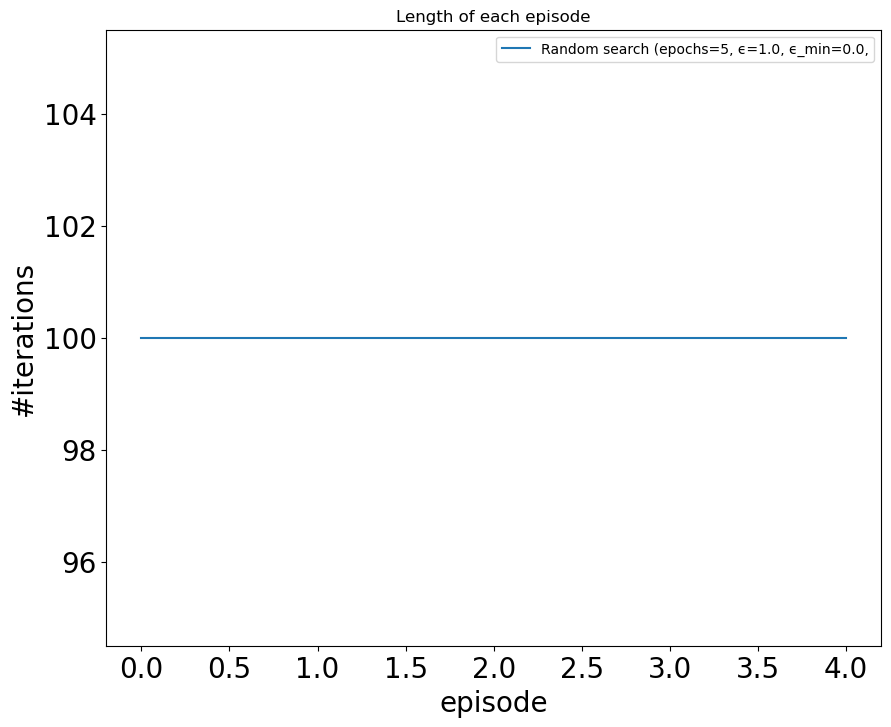

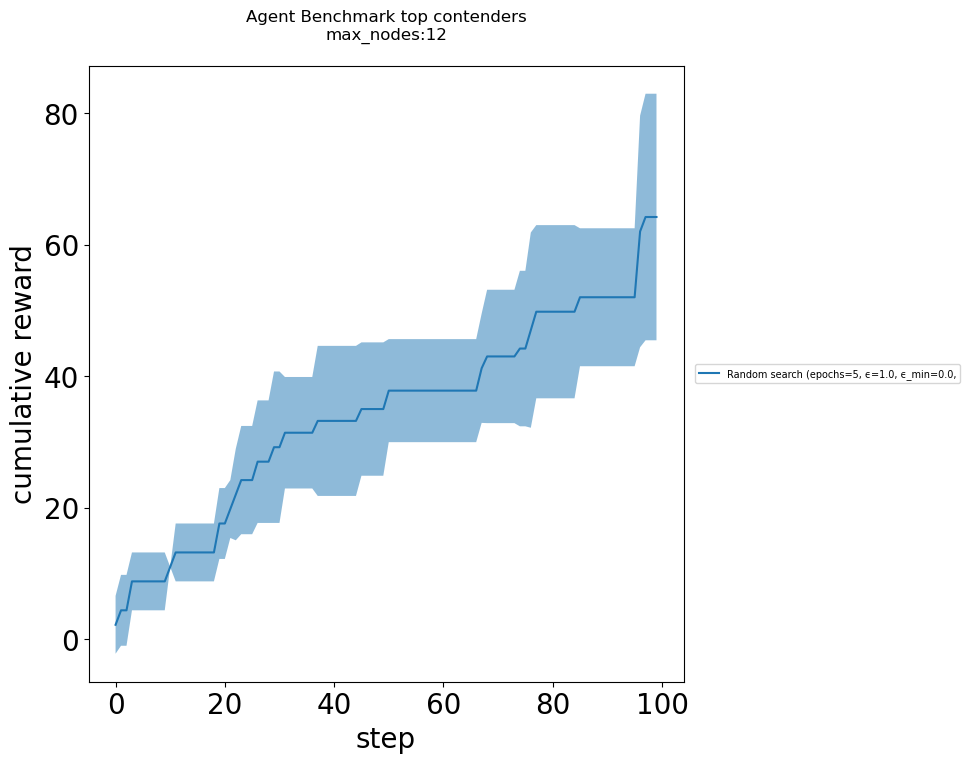

In [10]:
contenders = [random_run]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(
    title=f"Agent Benchmark top contenders\nmax_nodes:{ep.maximum_node_count}\n",
    all_runs=contenders,
    save_at=os.path.join(plots_dir, f"benchmark-{gymid}-cumreward_contenders.png"),
)

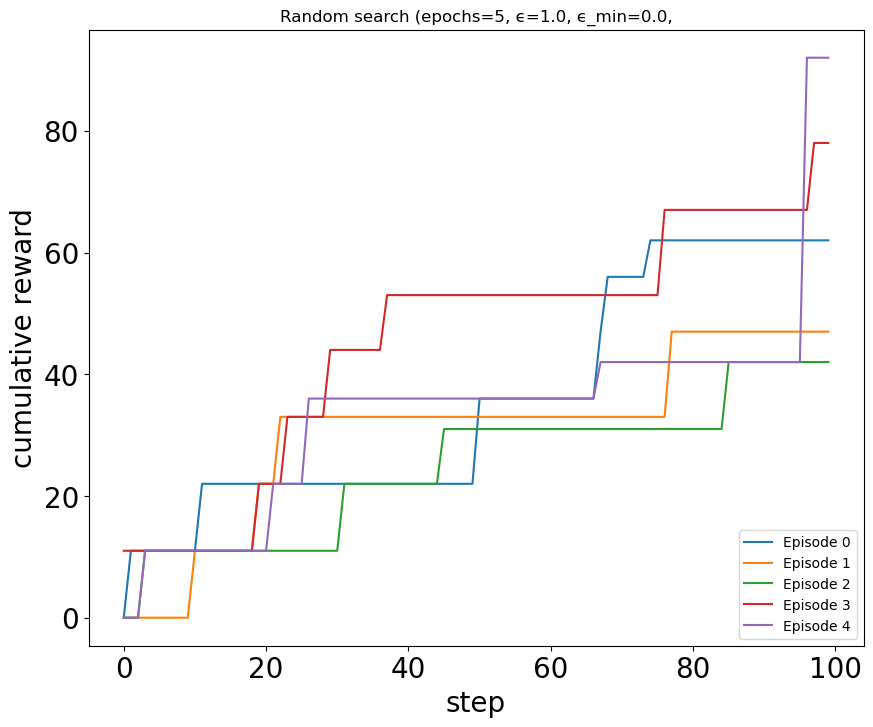

In [11]:
# Plot cumulative rewards for all episodes
for r in contenders:
    p.plot_all_episodes(r)